In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import pickle
from utils import exp
from itertools import chain
from msd_lib import MSD
plt.style.use("seaborn")
sns.set_context("paper", font_scale=2)  
import matplotlib as mpl
mpl.rcParams['font.size']=18
from utils import get_label

/users/christofor.eseroglou/.conda/envs/chris/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from rouse_lib import Rouse

In [2]:
data = pd.read_csv('../catalog.csv')
data = data[(data['N']==100_000)&(data['kT']>0.9)]
data

,id,N,L,steps,block_size,dt,gamma,A,intg,run_time,rho,kT
570,3000,100000,100.0,10000000,1000,0.01,0.001,3.0,langevin,6506.514705,0.100000,0.998442
571,2998,100000,69.3,10000000,1000,0.01,0.001,3.0,langevin,8004.068396,0.300469,1.000746
572,2996,100000,46.4,10000000,1000,0.01,0.001,3.0,langevin,10615.854214,1.001028,0.995622
573,2997,100000,46.4,10000000,1000,0.01,0.001,3.0,dpd,10687.059393,1.001028,0.998655
574,3002,100000,46.4,10000000,1000,0.01,0.010,3.0,langevin,10586.630195,1.001028,0.999033
575,3003,100000,46.4,10000000,1000,0.01,0.010,3.0,dpd,11278.748268,1.001028,1.002019
576,3007,100000,100.0,10000000,1000,0.01,0.010,3.0,dpd,5870.076941,0.100000,0.999167
577,3006,100000,100.0,10000000,1000,0.01,0.010,3.0,langevin,6404.009599,0.100000,0.997808
578,3004,100000,69.3,10000000,1000,0.01,0.010,3.0,langevin,8003.900947,0.300469,0.995562
579,3005,100000,69.3,10000000,1000,0.01,0.010,3.0,dpd,8024.558587,0.300469,1.002087


In [5]:
# def run(data):
#     results = {}
#     for ide in tqdm(list(data['id'])):
#         obj = Rouse(exp(ide))
#         obj.rouse()
#         results[ide]=[obj.modes, obj.rouse_cor]
#     return results

# RES = run(data)

# with open('final_rouse', 'wb') as f:
#     pickle.dump(RES, f)

100%|██████████| 25/25 [46:27<00:00, 111.52s/it]


In [5]:
panel_a = list(data[(data['intg']=='langevin')&(data['L']==46.4)]['id'])
panel_b = list(data[(data['intg']=='langevin')&(data['L']==69.3)]['id'])
panel_c = list(data[(data['intg']=='langevin')&(data['L']==100.0)]['id'])
panel_d = list(data[(data['intg']=='dpd')&(data['L']==46.4)]['id'])
panel_e = list(data[(data['intg']=='dpd')&(data['L']==69.3)]['id'])
panel_f = list(data[(data['intg']=='dpd')&(data['L']==100.0)]['id'])
panel_g = list(data[(data['intg']=='brownian')&(data['L']==46.4)]['id'])
panel_h = list(data[(data['intg']=='brownian')&(data['L']==69.3)]['id'])
panel_i = list(data[(data['intg']=='brownian')&(data['L']==100.0)]['id'])

In [7]:
with open('final_rouse', 'rb') as f:
    RES = pickle.load(f)

In [3]:
def get_label(ide, char):
    return list(data[data['id']==ide][char])[0]

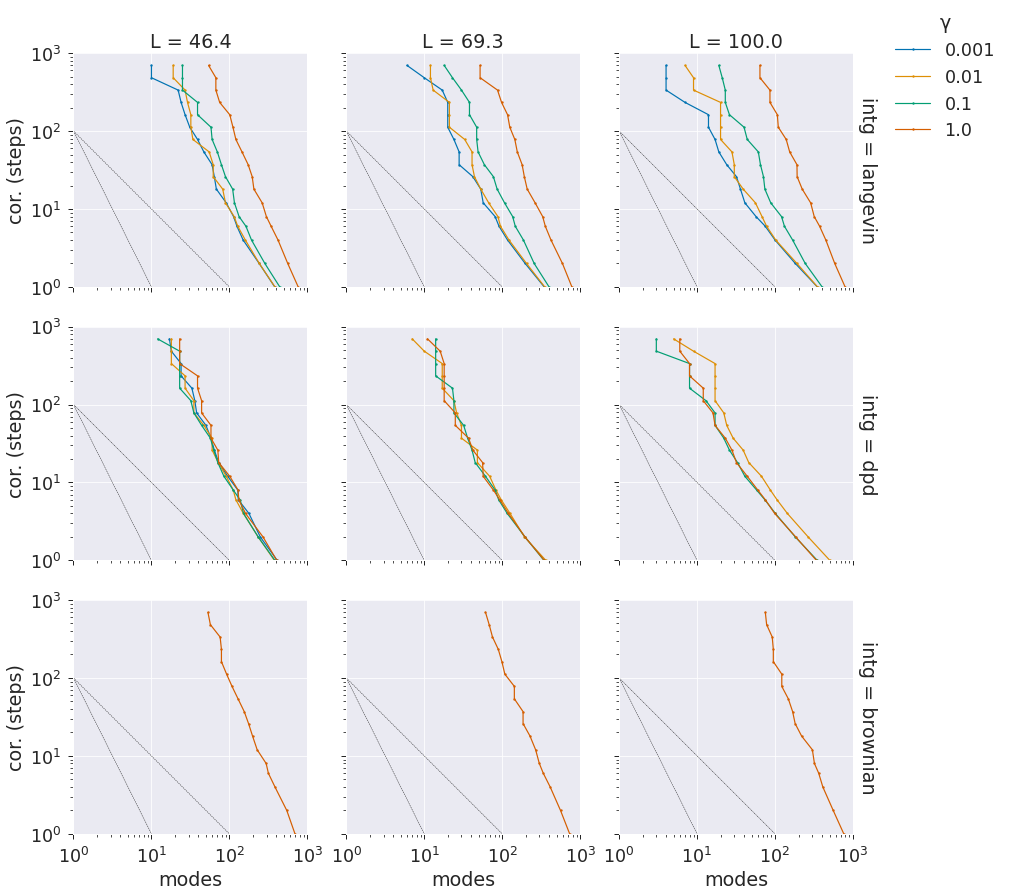

In [16]:
g = sns.FacetGrid(data, row='intg',col='L', margin_titles=True, height=4, aspect = 1)
axes = g.axes
axes = list(chain(*axes))

hue_params = [0.001,0.01,0.1,1,10]
colors = sns.color_palette('colorblind')[:len(hue_params)]
color_dic = dict(zip(hue_params,colors))



for i,panel in enumerate([panel_a, panel_b,panel_c, panel_d, panel_e, panel_f, panel_g, panel_h, panel_i]):
    axes[i].axline((1e0,1e2),slope=-1, color='k',linestyle='dashed',linewidth=0.4)
    axes[i].axline((1e0,1e2),slope=-2, color='k',linestyle='dashed',linewidth=0.4)
    for ide in panel:
        gamma = get_label(ide, 'gamma')
        axes[i].plot(RES[ide][1], RES[ide][0], linestyle='solid', color = color_dic[gamma],marker='.', label = gamma)
        
for i in range(len(axes)):        
    axes[i].set(xscale = 'log',yscale='log',xlabel='modes',ylabel='cor. (steps)', xlim =[1e0,1e3], ylim = [1,1e3], aspect=1.0)
axes[2].legend(title='γ', loc=(1.15,0.6))